## 1. Importing the required libraries

In [1]:
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px
import math

import os
import glob

import datetime
import time
from datetime             import date
from datetime             import datetime, date, time

from itertools            import combinations
from collections          import Counter

%matplotlib inline

In [2]:
# seaborn settings
sns.set_style('darkgrid')

### 1.1 Merge the 12 months of sales data into a single CSV file

In [3]:
path = '/Users/chidilan/Desktop/My Projects/Python/Tech Store Sales Analysis/Data'

csv_files = glob.iglob(os.path.join(path, '*.csv'))
df1 = (pd.read_csv(file)for file in csv_files)
df2 = pd.concat(df1, axis=0, ignore_index=True)

df2.to_csv(path + '//' + 'sales' + '.csv', index=False)

### 1.2 Read the new file

In [6]:
data_source = pd.read_csv('/Users/chidilan/Desktop/My Projects/Python/Tech Store Sales Analysis/Data/sales.csv')
data_source.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### 1.3 Creating a Copy

In [8]:
df = data_source.copy()
df.shape

(186850, 6)

<hr>

## 2.0 Sanity Check

### 2.1 Check and remove NaN rows

In [9]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
# Let's remove any row where all values are NaN
df = df.dropna(how='all')

#Now let's see which rows contain at least one NaN
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Seems there is non, Perfect!

<hr>

### 2.2 Check And Remove Errors

In [13]:
df.sort_values(by='Order ID', ascending=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
137448,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
137449,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
137450,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
137451,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
137452,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
62927,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
63191,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
63377,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
df_remove = df[(df['Order ID'] == 'Order ID')]

df_remove.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
df_2 = df.drop(df_remove.index)

<hr>

### 2.3 Check and Change Data Types

In [17]:
df_2.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [21]:
# Let's change the Order Date From OBJECT to DATE
df_2['Order Date'] = pd.to_datetime(df['Order Date'].str.strip(), format='%m/%d/%y %H:%M', errors='coerce')

# Changing Quantity Ordered to INT
df_2['Quantity Ordered'] = df_2['Quantity Ordered'].astype(int)

#Changing Price Each Ordered to Float
df_2['Price Each'] = df_2['Price Each'].astype(float)

In [22]:
#Now let's see if it worked
df_2.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

Perfect! It worked, on to the next

<hr>

### 2.4 Spliting Columns (Order Date and Purchase Address)

In [42]:
# Let's Spilt the 'Order Date' into 'Year', 'Month', And 'Hour'
df_2['Year'] = df_2['Order Date'].dt.year
df_2['Month'] = df_2['Order Date'].dt.month
df_2['Hour'] = df_2['Order Date'].dt.hour

# Spilting the Purchase Address into 'Address', 'City', 'State'
df_2[['Address', 'City', 'State']] =df_2['Purchase Address'].str.split(',', expand=True)

In [43]:
# Now to Check if it worked

df_2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Address,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,12,0,136 Church St,New York City,NY 10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019,12,7,562 2nd St,New York City,NY 10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019,12,18,277 Main St,New York City,NY 10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019,12,15,410 6th St,San Francisco,CA 94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019,12,12,43 Hill St,Atlanta,GA 30301
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019,6,19,795 Pine St,Boston,MA 02215
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019,6,19,495 North St,New York City,NY 10001
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019,6,18,319 Ridge St,San Francisco,CA 94016
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019,6,18,916 Main St,San Francisco,CA 94016


In [44]:
#spliting the 'state' from ZipCode

df_2['State'] = df_2['State'].str[:3]

df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Address,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,12,0,136 Church St,New York City,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019,12,7,562 2nd St,New York City,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019,12,18,277 Main St,New York City,NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019,12,15,410 6th St,San Francisco,CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019,12,12,43 Hill St,Atlanta,GA


In [46]:
#Let's Create a Location Column

df_2['Location'] = df_2['City'].astype(str) + '-' + df_2['State'].astype(str)
df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Address,City,State,Location
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,12,0,136 Church St,New York City,NY,New York City- NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019,12,7,562 2nd St,New York City,NY,New York City- NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019,12,18,277 Main St,New York City,NY,New York City- NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019,12,15,410 6th St,San Francisco,CA,San Francisco- CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019,12,12,43 Hill St,Atlanta,GA,Atlanta- GA


<hr>

### 2.5 Create 'Sales' column

In [47]:
df_2['Sales'] = df_2['Quantity Ordered'] * df_2['Price Each']

df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Address,City,State,Location,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,12,0,136 Church St,New York City,NY,New York City- NY,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019,12,7,562 2nd St,New York City,NY,New York City- NY,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019,12,18,277 Main St,New York City,NY,New York City- NY,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019,12,15,410 6th St,San Francisco,CA,San Francisco- CA,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019,12,12,43 Hill St,Atlanta,GA,Atlanta- GA,11.95


<hr>

### 2.6 Drop 2020 year rows

In [49]:
df_2.groupby('Year').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Address,City,State,Location,Sales
Year,,,,,,,,,,,,,
2019,185916,185916,185916,185916,185916,185916,185916,185916,185916,185916,185916,185916,185916
2020,34,34,34,34,34,34,34,34,34,34,34,34,34


In this dataframe we have a few values from 2020. Our intention is only to analyse 2019, so I decided to drop 2020.

In [55]:
# Get 2020 indexes for which column
index_2020 = df_2[df_2['Year'] == 2020].index

#delete these row indexes from dataFrame
df_2.drop(index_2020, inplace=True)

#lets check
df_2['Year'].unique()

array([2019], dtype=int32)

### 2.7 Drop unused columns

In [57]:
df_3 = df_2.drop(['Order Date', 'Purchase Address', 'Address', 'City', 'State'], axis=1)

df_3.head()

,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Hour,Location,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019,12,0,New York City- NY,1700.00
1,295666,LG Washing Machine,1,600.00,2019,12,7,New York City- NY,600.00
2,295667,USB-C Charging Cable,1,11.95,2019,12,18,New York City- NY,11.95
3,295668,27in FHD Monitor,1,149.99,2019,12,15,San Francisco- CA,149.99
4,295669,USB-C Charging Cable,1,11.95,2019,12,12,Atlanta- GA,11.95


<hr>

## 3.0 Data Analysis

### 3.1 What is the average ticket by month?

In [58]:
avg_ticket = (
    df_3.groupby('Month')
        .agg(Number_of_Orders=('Order ID', 'count'),
             Total_Sales=('Sales', 'sum'))
        .reset_index()
)

avg_ticket['Avg_Ticket'] = (avg_ticket['Total_Sales'] / avg_ticket['Number_of_Orders']).round(2)

avg_ticket


,Month,Number_of_Orders,Total_Sales,Avg_Ticket
0,1,9675,1813586.44,187.45
1,2,11975,2202022.42,183.88
2,3,15153,2807100.38,185.25
3,4,18279,3390670.24,185.50
4,5,16566,3152606.75,190.31
5,6,13554,2577802.26,190.19
6,7,14293,2647775.76,185.25
7,8,11961,2244467.88,187.65
8,9,11621,2097560.13,180.50
9,10,20282,3736726.88,184.24


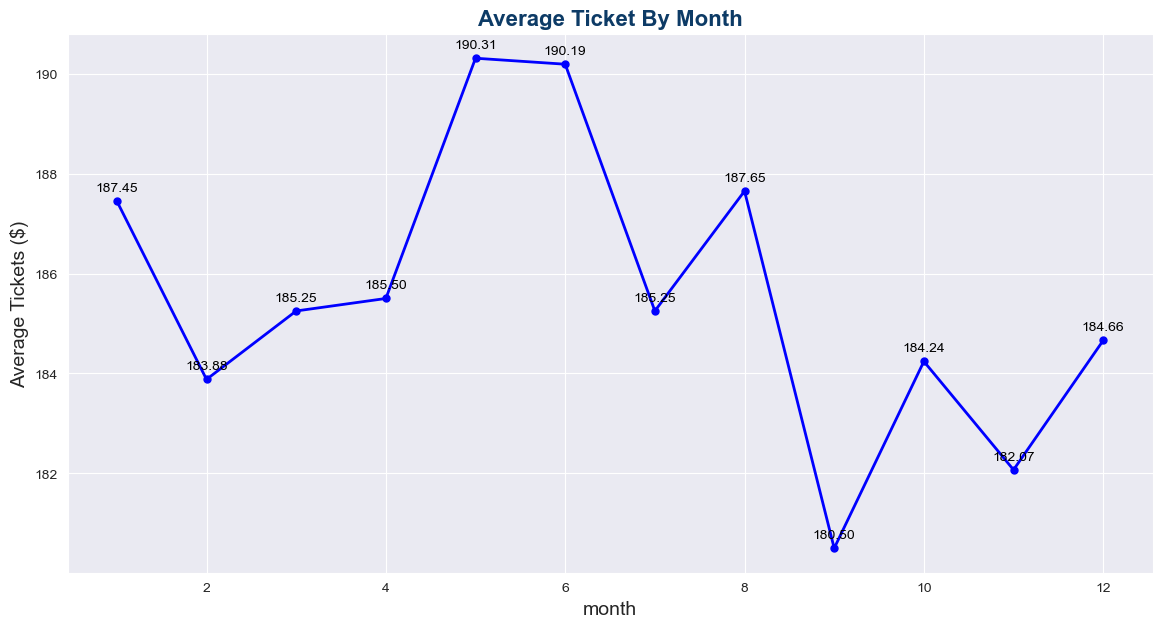

In [141]:
plt.figure(figsize=(14,7))

plt.plot(
    avg_ticket['Month'],
    avg_ticket['Avg_Ticket'],
    '-o',
    color='blue',
    markerfacecolor='blue',
    markersize=5,
    linewidth=2
)

plt.title(
    'Average Ticket By Month',
    fontsize=16,
    fontweight='bold',
    color='#0D3B66'
)

plt.xlabel(
    'month',
    fontsize=14
)

plt.ylabel(
    'Average Tickets ($)',
    fontsize=14
)

for x,y in zip(avg_ticket['Month'], avg_ticket['Avg_Ticket']):
    plt.text(x, y+0.2, f'{y:.2f}', ha='center', fontsize=10, color='black')

plt.savefig('AvgTicketByMonth.png', dpi=300, bbox_inches='tight')
plt.show()

**Results:** The average ticket amount for the year was 185.00, with the highest values in the months of May and June, at around 190.00.

<hr>

### 3.2 How were the sales throughout the year?

In [72]:
sales_by_month = (
    df_3.groupby('Month', as_index=False)['Sales']
    .sum()
    .rename(columns={'Sales':'Total_Sales'})
)

sales_by_month['Sales Growth %'] = (sales_by_month['Total_Sales'].pct_change() * 100).round(1)

sales_by_month

,Month,Total_Sales,Sales Growth %
0,1,1813586.44,NaN
1,2,2202022.42,21.4
2,3,2807100.38,27.5
3,4,3390670.24,20.8
4,5,3152606.75,-7.0
5,6,2577802.26,-18.2
6,7,2647775.76,2.7
7,8,2244467.88,-15.2
8,9,2097560.13,-6.5
9,10,3736726.88,78.1


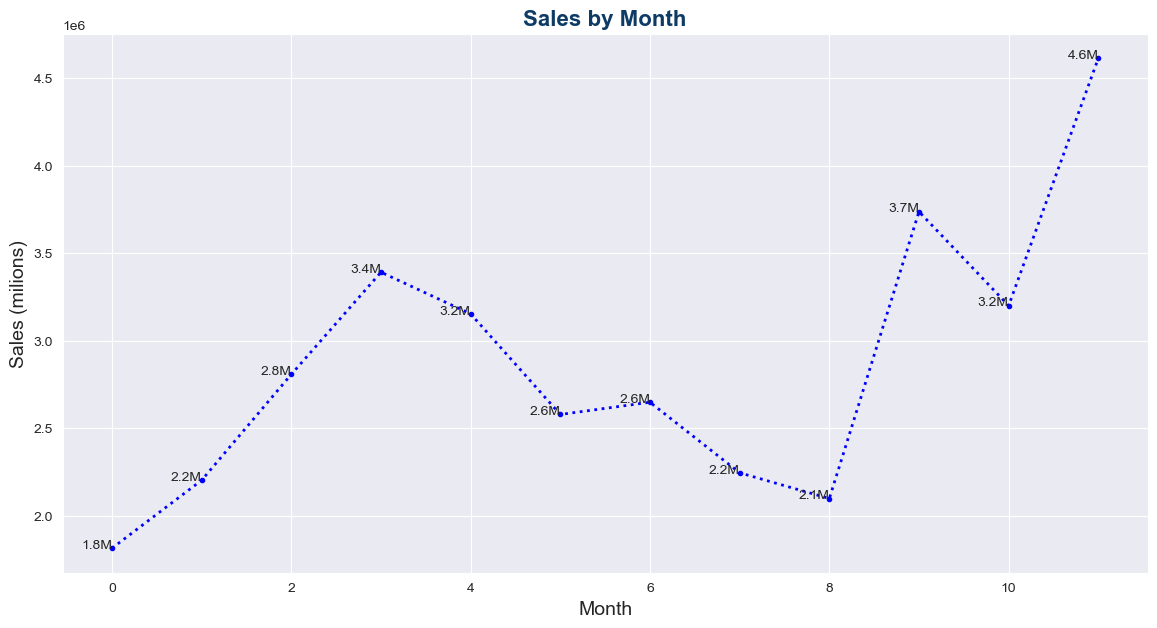

In [140]:
plt.subplots(figsize=(14, 7))
 
plt.plot(sales_by_month['Total_Sales'], 'b:o', linewidth=2, markersize=3) 
plt.title('Sales by Month', fontsize=16, fontweight='bold', color='#0D3B66') 
plt.xlabel('Month', fontsize=14) 
plt.ylabel('Sales (milions)', fontsize=14)

for (x, y) in enumerate (sales_by_month['Total_Sales']):
    plt.text(x=sales_by_month['Month'][x] - 1,
             y=y + 5,
             s='{:,.1f}M'.format(sales_by_month['Total_Sales'].values[x]/1000000),
             ha='right') 
plt.savefig('GrowthPercentageByMonth.png', dpi=300, bbox_inches='tight')
plt.show()

**Results:** Although the year ended with a significant increase compared to the beginning of the period, sales were unstable throughout 2019, showing periods of sales increase followed by long periods of decline.

We can observe an increase in sales of around 23.2% per month in the period from January to April 2019. The months of May and September are followed by constant declines, especially in June (-18.2%) and August (-15.2%). The month of October showed a significant growth of 78.1%, with revenues rising from 2.1M to 3.7M. November presented a new drop of 14.4%, closing the year with the highest turnover of the year at 4.6M.

**Recommendation:** Investigate the cause of the extended sales decreases. As we only have one year's worth of information collected, we cannot yet say whether this pattern will repeat itself in the coming years

### 3.3 Which location had the highest number of sales?

In [96]:
sales_by_city = (
    df_3.groupby('Location',as_index=False)['Sales']
    .sum()
    .sort_values(by='Sales', ascending=False)
    .reset_index(drop=True)
)

sales_by_city['%'] = round((sales_by_city['Sales'] / sales_by_city['Sales'].sum()) * 100, 1)

sales_by_city

,Location,Sales,%
0,San Francisco- CA,8259719.03,24.0
1,Los Angeles- CA,5451570.81,15.8
2,New York City- NY,4662976.81,13.5
3,Boston- MA,3660315.12,10.6
4,Atlanta- GA,2795498.58,8.1
5,Dallas- TX,2766260.45,8.0
6,Seattle- WA,2747605.49,8.0
7,Portland- OR,1870579.35,5.4
8,Austin- TX,1819081.77,5.3
9,Portland- ME,449758.27,1.3


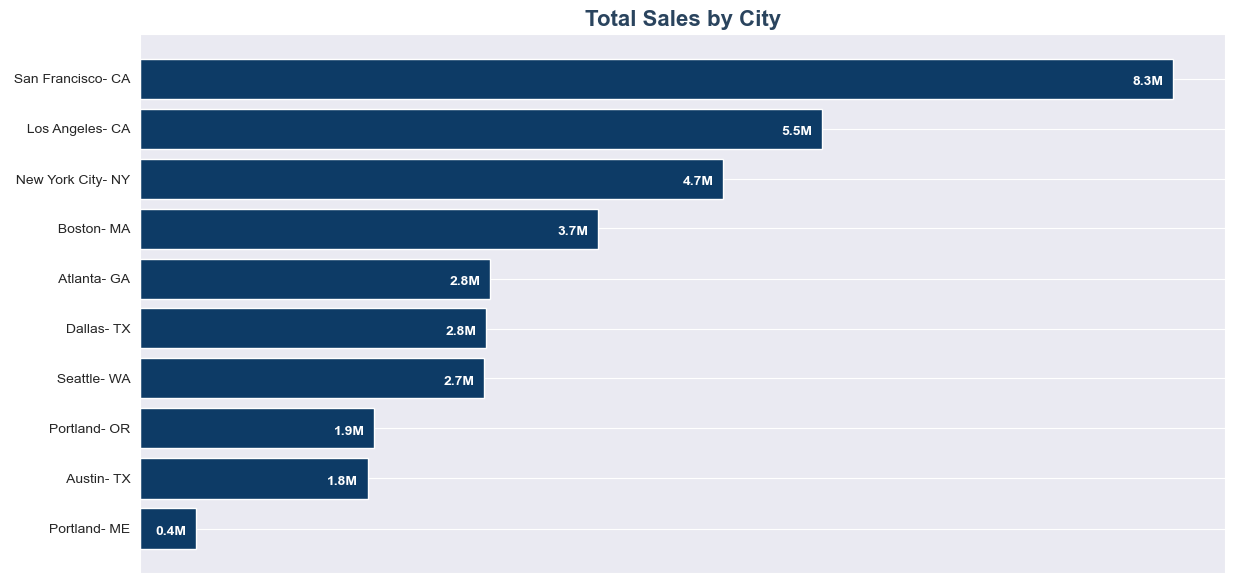

In [139]:
fig,ax = plt.subplots(figsize=(14,7))

ax.barh (
    sales_by_city['Location'], 
    sales_by_city['Sales'].values, 
    color='#0D3B66'
)

for x in range(0,10):
    ax.annotate('{:,.1f}M'.format(sales_by_city['Sales'].values[x]/1000000), (sales_by_city['Sales'].values[x], x),
                ha='center',
                va='top',
                xytext=(-18,2),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                color='white'
               )

ax.invert_yaxis()
ax.set_title('Total Sales by City', fontsize=16, fontweight='bold', color='#2A445E')
ax.xaxis.set_visible(False)

plt.savefig('TotalSalesByCity.png', dpi=300, bbox_inches='tight')
plt.show()

**Results:** The state of California represents the largest share of sales, with about 40% of the total. San Francisco reached 24% of sales, even though it has a population that represents 4.7% of the analyzed cities, followed by Los Angeles with 16% of sales.

New York, which has the largest population among those analyzed, reached 13.5% of sales, followed by Boston with 10.6%. Portland, Maine, represents only 1.3% of sales, but it is the smallest city among those analyzed, with an estimated population of 68 thousand inhabitants.

**Recommendation:** Reinforce marketing in New York, which has a very large potential market and could be further explored, considering the number of inhabitants, and purchasing power.

### 3.4 What products are most often sold?

In [108]:
product_sales = (
    df_3[['Product', 'Sales', 'Quantity Ordered']].groupby('Product', as_index=False)
    .sum()
    .sort_values(by='Sales', ascending=False)
    .reset_index(drop=True)
)

product_sales['% Sales'] = round((product_sales['Sales'] / product_sales['Sales'].sum()) * 100, 1)
product_sales['% Quantity'] = round(product_sale['Quantity Ordered'] / product_sales['Quantity Ordered'].sum() * 100, 1)

product_sales

,Product,Sales,Quantity Ordered,% Sales,% Quantity
0,Macbook Pro Laptop,8035900.00,4727,23.3,2.3
1,iPhone,4792900.00,6847,13.9,3.3
2,ThinkPad Laptop,4127958.72,4128,12.0,2.0
3,Google Phone,3318600.00,5531,9.6,2.6
4,27in 4K Gaming Monitor,2434707.57,6243,7.1,3.0
5,34in Ultrawide Monitor,2355558.01,6199,6.8,3.0
6,Apple Airpods Headphones,2348550.00,15657,6.8,7.5
7,Flatscreen TV,1445400.00,4818,4.2,2.3
8,Bose SoundSport Headphones,1345265.46,13454,3.9,6.4
9,27in FHD Monitor,1131974.53,7547,3.3,3.6


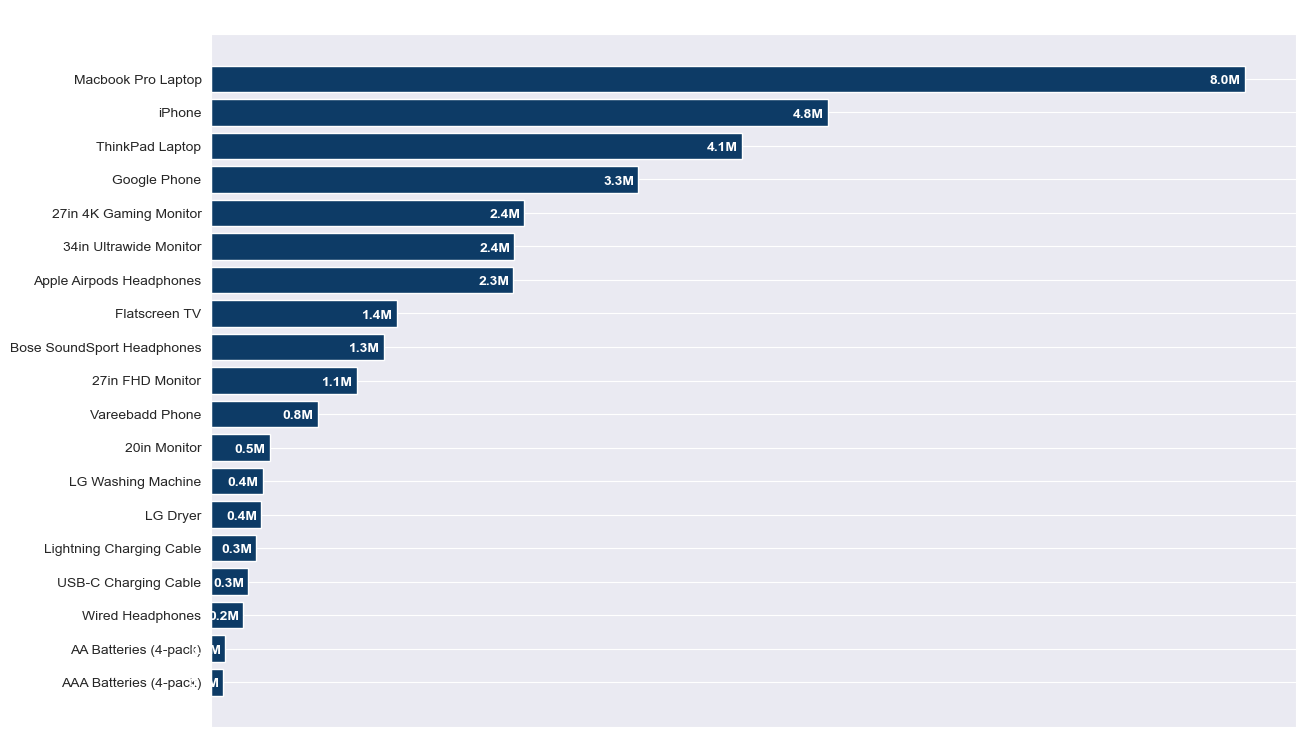

In [159]:
fig,ax = plt.subplots(figsize=(14,9))

ax.barh(
    product_sales['Product'], 
    product_sales['Sales'].values, 
    color='#0D3B66'
)

for x in range(0,19):
    ax.annotate('{:,.1f}M'.format(product_sales['Sales'].values[x]/1000000), (product_sales['Sales'].values[x], x),
                ha='center',
                va='top',
                xytext=(-14,3),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                color='white'
               )

ax.invert_yaxis()
ax.set_title(
    'Total Sales by Products',
    fontsize=16,
    fontweight='bold',
    color='white'
)

ax.xaxis.set_visible(False)

plt.savefig('TotalSalesbyProducts.png', dpi=300, bbox_inches='tight')
plt.show()

**Results:** Almost half of all sales are concentrated in the three most expensive products: the MacBook Pro laptop (23.3%), the iPhone (13.9%), and the ThinkPad laptop (12.3%). An average of 5200 units of each product were sold.

In terms of units sold, the largest quantities were cables, wired headphones, and batteries, at around 25,000 units each. These goods sold in large quantities because they were the least expensive.

### 2.5 What products are most often sold together?

In [145]:
# create a nem dataframe to separate the duplicated values of Order ID
sold_together = df_2[df_2['Order ID'].duplicated(keep=False)].copy()

# joining few products with the same Order ID into the same line
sold_together['Grouped'] = df_2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#dropping the duplicate values
sold_together = sold_together[['Order ID', 'Grouped']].drop_duplicates()

# Counting the pair of products and creating a new variable for Counter
count = Counter()

# make a for loop
for row in sold_together['Grouped']:
    row_list =row.split(',')
    count.update(Counter(combinations(row_list, 2)))

df_together = pd.DataFrame(count.items(),
                          columns=['Products Sold Together', 'Quantity']).sort_values(by='Quantity', ascending=False)
df_together['% Quantity'] = round((df_together['Quantity'] / df_together['Quantity'].sum()) * 100, 1)

df_together.head(10)

,Products Sold Together,Quantity,% Quantity
8,"(iPhone, Lightning Charging Cable)",1004,12.7
0,"(Google Phone, USB-C Charging Cable)",987,12.5
10,"(iPhone, Wired Headphones)",447,5.7
2,"(Google Phone, Wired Headphones)",414,5.2
6,"(Vareebadd Phone, USB-C Charging Cable)",361,4.6
9,"(iPhone, Apple Airpods Headphones)",359,4.5
1,"(Google Phone, Bose SoundSport Headphones)",220,2.8
4,"(USB-C Charging Cable, Wired Headphones)",160,2.0
36,"(Vareebadd Phone, Wired Headphones)",143,1.8
24,"(Lightning Charging Cable, Wired Headphones)",92,1.2


**Results:** The top 5 best-selling products together are cell phones with chargers or headphones, which account for about 40% of sales.

**Recommendation:** Implement marketing campaigns for these items at the same time, with the option of recommending group purchases of products on the website.

### 2.6 What time should we display adverstisement to maximize likelihood of customer's buying product?

In [147]:
sales_by_hour = (
    df_3.groupby('Hour', as_index=False)
    .agg(
        Number_of_Orders=('Order ID', 'count'),
        Quantity_ordered=('Quantity Ordered', 'sum'),
        Total_sales=('Sales', 'sum')
    )
)

sales_by_hour

,Hour,Number_of_Orders,Quantity_ordered,Total_sales
0,0,3898,4412,711060.59
1,1,2341,2610,458561.97
2,2,1239,1394,232586.50
3,3,828,922,144697.99
4,4,850,933,162396.09
5,5,1319,1491,230564.88
6,6,2482,2810,448113.00
7,7,4011,4556,744854.12
8,8,6256,7002,1192348.97
9,9,8748,9816,1639030.58


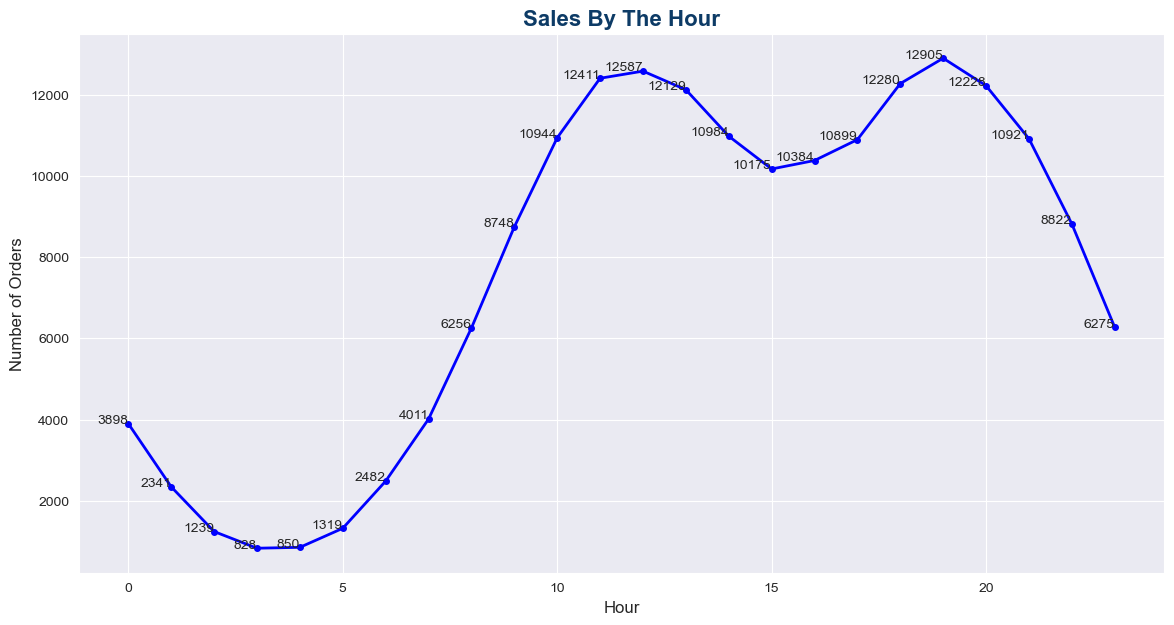

In [158]:
plt.subplots(figsize=(14,7))

plt.plot(
    sales_by_hour['Hour'],
    sales_by_hour['Number_of_Orders'],
    '-o',
    color='blue',
    markerfacecolor='blue',
    linewidth=2,
    label='Number of Orders',
    markersize=4
)

plt.title(
    'Sales By The Hour',
    fontsize=16,
    fontweight='bold',
    color='#0D3B66'
)

plt.xlabel(
    'Hour',
    fontsize=12
)

plt.ylabel(
    'Number of Orders',
    fontsize=12
)

for x,y in enumerate(sales_by_hour['Number_of_Orders']):
    plt.text(
        x=sales_by_hour['Hour'][x],
        y= y+8,
        s=f'{y}',
        ha='right'
    )

plt.savefig('SalesByTheHour.png', dpi=300, bbox_inches='tight')
plt.show()

**Results:** More than 60% of sales are concentrated between 11 a.m. and 8 p.m., with the peak of sales occurring at 7 p.m., accounting for 7% of sales. 

**Recommendation:** This early evening time is the most recommended time for advertising.

# Conclusion

According to the data analyzed, we can see that most sales are concentrated in the state of California (40%), which despite having a much smaller population than New York, has a much greater purchasing power compared to other locations. It is recommended to intensify marketing campaigns in this region, especially for Apple products, which can result in a higher sales value.

The products that are best sold together are cell phones and their accessories. It is recommended to intensify the simultaneous announcement of these products.

We observed that sales throughout the year had considerable fluctuations, even having closed the year with a positive leap. A more accurate investigation is recommended to understand the reason for this behavior, especially in the period from May to September.